In [1]:
library(cicero)
library(Seurat)
library(Signac)
library(magrittr)
library(genomation)
library(GenomicRanges)
library(Matrix)
library(ggplot2)

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading requi

Specify file path

In [2]:
path.seurat = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/5.merge_peaks_from_5_super_groups.240524/obj.seurat.rds"
path.matrix.atac_count = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/5.merge_peaks_from_5_super_groups.240524/matrix.atac.5_super_groups.rds"
path.pairs.E2G = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/1.prepare_data/5.merge_peaks_from_5_super_groups.240524/pairs.rds"
path.TSS1kb = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240508/sc-E2G/test/results_K562_Xu/K562/Neighborhoods/GeneList.TSS1kb.bed"
path.chrom.sizes = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240508/sc-E2G/ENCODE_rE2G/ABC/reference/hg38/GRCh38_EBV.chrom.sizes.tsv"
dir.output = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/BMMC/2.Genome_wide_prediction/Cicero/BMMC5.merge.240524/"

In [3]:
distance_constraint = 1000000 
window = 2000000

Import seurat object

In [4]:
obj.seurat = readRDS(path.seurat)

Import ATAC matrix

In [5]:
matrix.atac_count = readRDS(path.matrix.atac_count)
matrix.atac = BinarizeCounts(matrix.atac_count)
rm(matrix.atac_count)

Import candidate E-G pairs

In [6]:
pairs.E2G = readRDS(path.pairs.E2G)

Import TSS1kb regions

In [7]:
bed.TSS1kb = readGeneric(path.TSS1kb,
                         header = F,
                         keep.all.metadata = T)
bed.TSS1kb

GRanges object with 20666 ranges and 3 metadata columns:
          seqnames            ranges strand |          V4        V5          V6
             <Rle>         <IRanges>  <Rle> | <character> <integer> <character>
      [1]     chr1       35581-36581      * |     FAM138A         0           -
      [2]     chr1       35581-36581      * |     FAM138F         0           -
      [3]     chr1       68590-69590      * |       OR4F5         0           +
      [4]     chr1     816870-817870      * |      FAM87B         0           +
      [5]     chr1     827022-828022      * |   LINC00115         0           -
      ...      ...               ...    ... .         ...       ...         ...
  [20662]     chrY 21385860-21386860      * |       PRORY         0           -
  [20663]     chrY 21594166-21595166      * |      TTTY13         0           -
  [20664]     chrY 22298376-22299376      * |       TTTY5         0           -
  [20665]     chrY 23198592-23199592      * |        DAZ1      

Create a Cicero CDS

In [8]:
cellinfo = obj.seurat@meta.data[colnames(matrix.atac),]
cellinfo[,"cell"] = rownames(cellinfo)
cellinfo

,orig.ident,nCount_RNA,nFeature_RNA,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,⋯,QCMeds,DonorSmoker,rename,nCount_ATAC_empty,nFeature_ATAC_empty,cell_type.rename,cell_type.merged,nCount_ATAC,nFeature_ATAC,cell
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
s1d1_TAGTTGTCACCCTCAC-1,s1d1,1701,1121,TAGTTGTCACCCTCAC-1,TAGTTGTCACCCTCAC-1,GGACAACGTAAGTGGC-1,1,0,13548,13091,⋯,False,Nonsmoker,s1d1_TAGTTGTCACCCTCAC-1,0,0,Naive_CD20_pos_B,B,4287,3758,s1d1_TAGTTGTCACCCTCAC-1
s1d1_CTATGGCCATAACGGG-1,s1d1,2157,1277,CTATGGCCATAACGGG-1,CTATGGCCATAACGGG-1,CAACCTGGTCCTCCCA-1,1,0,12415,11865,⋯,False,Nonsmoker,s1d1_CTATGGCCATAACGGG-1,0,0,CD14_pos_Mono,Myeloid,9970,8298,s1d1_CTATGGCCATAACGGG-1
s1d1_CCGCACACAGGTTAAA-1,s1d1,8311,3589,CCGCACACAGGTTAAA-1,CCGCACACAGGTTAAA-1,GAACCGGGTTAACACC-1,1,0,64631,62125,⋯,False,Nonsmoker,s1d1_CCGCACACAGGTTAAA-1,0,0,CD8_pos_T,T,4970,4246,s1d1_CCGCACACAGGTTAAA-1
s1d1_TCATTTGGTAATGGAA-1,s1d1,1291,887,TCATTTGGTAATGGAA-1,TCATTTGGTAATGGAA-1,CCGCAAGCAGGTTCTT-1,1,0,8873,8544,⋯,False,Nonsmoker,s1d1_TCATTTGGTAATGGAA-1,0,0,CD8_pos_T,T,3066,2783,s1d1_TCATTTGGTAATGGAA-1
s1d1_ACCACATAGGTGTCCA-1,s1d1,2128,1337,ACCACATAGGTGTCCA-1,ACCACATAGGTGTCCA-1,GGTTACCTCCTCACGG-1,1,0,14880,14353,⋯,False,Nonsmoker,s1d1_ACCACATAGGTGTCCA-1,0,0,CD16_pos_Mono,Myeloid,1917,1714,s1d1_ACCACATAGGTGTCCA-1
s1d1_TGGATTGGTTTGCGAA-1,s1d1,16740,4729,TGGATTGGTTTGCGAA-1,TGGATTGGTTTGCGAA-1,CAACATGCACCTGGCT-1,1,0,126119,122017,⋯,False,Nonsmoker,s1d1_TGGATTGGTTTGCGAA-1,0,0,B1_B,B,3040,2839,s1d1_TGGATTGGTTTGCGAA-1
s1d1_GACTTAGGTTGCGCGA-1,s1d1,1182,876,GACTTAGGTTGCGCGA-1,GACTTAGGTTGCGCGA-1,TTAGGATCACTAGCTT-1,1,0,8982,8675,⋯,False,Nonsmoker,s1d1_GACTTAGGTTGCGCGA-1,0,0,CD4_pos_T_naive,T,5022,4437,s1d1_GACTTAGGTTGCGCGA-1
s1d1_GCCTTACTCGTTACAA-1,s1d1,10154,4021,GCCTTACTCGTTACAA-1,GCCTTACTCGTTACAA-1,CTAGCCTAGTGCAACG-1,1,0,69068,65936,⋯,False,Nonsmoker,s1d1_GCCTTACTCGTTACAA-1,0,0,CD4_pos_T_activated,T,28730,16709,s1d1_GCCTTACTCGTTACAA-1
s1d1_GTAAGGTCAATAACCT-1,s1d1,2041,1264,GTAAGGTCAATAACCT-1,GTAAGGTCAATAACCT-1,TCAACCGGTCGAGGCA-1,1,0,16490,15900,⋯,False,Nonsmoker,s1d1_GTAAGGTCAATAACCT-1,0,0,B1_B,B,8234,6611,s1d1_GTAAGGTCAATAACCT-1


In [9]:
peakinfo = do.call(rbind,
                   strsplit(rownames(matrix.atac),"-"))
peakinfo = as.data.frame(peakinfo)
names(peakinfo) <- c("chr", "bp1", "bp2")
peakinfo$site_name <- paste(peakinfo$chr, peakinfo$bp1, peakinfo$bp2, sep="-")
row.names(peakinfo) <- peakinfo$site_name                   
peakinfo

,chr,bp1,bp2,site_name
,<chr>,<chr>,<chr>,<chr>
chr1-10010-10512,chr1,10010,10512,chr1-10010-10512
chr1-115495-115916,chr1,115495,115916,chr1-115495-115916
chr1-180477-181904,chr1,180477,181904,chr1-180477-181904
chr1-191243-191960,chr1,191243,191960,chr1-191243-191960
chr1-267886-268118,chr1,267886,268118,chr1-267886-268118
chr1-271197-271546,chr1,271197,271546,chr1-271197-271546
chr1-586097-586303,chr1,586097,586303,chr1-586097-586303
chr1-778320-779291,chr1,778320,779291,chr1-778320-779291
chr1-796038-796388,chr1,796038,796388,chr1-796038-796388


In [10]:
input_cds <-  suppressWarnings(new_cell_data_set(matrix.atac,
                               cell_metadata = cellinfo,
                               gene_metadata = peakinfo))

In [11]:
input_cds <- monocle3::detect_genes(input_cds)
#Ensure there are no peaks included with zero reads
input_cds <- input_cds[Matrix::rowSums(exprs(input_cds)) != 0,] 

In [12]:
set.seed(2017)
input_cds <- detect_genes(input_cds)
input_cds <- estimate_size_factors(input_cds)
input_cds <- preprocess_cds(input_cds, method = "LSI")
input_cds <- reduce_dimension(input_cds, reduction_method = 'UMAP', 
                              preprocess_method = "LSI")

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'



No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



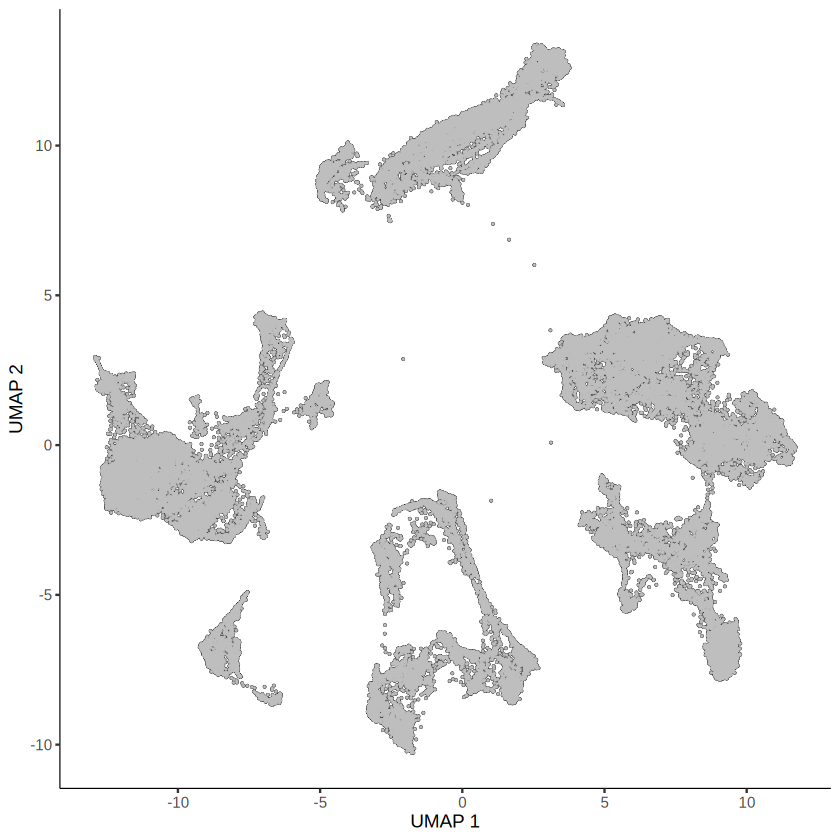

In [13]:
plot_cells(input_cds)

In [14]:
umap_coords <- reducedDims(input_cds)$UMAP
cicero_cds <- make_cicero_cds(input_cds, reduced_coordinates = umap_coords)

Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 0.0437364264773822
Median shared cells bin-bin: 0



Run Cicero

In [15]:
human.hg38.genome = read.table(path.chrom.sizes,
                               header = F)
human.hg38.genome

V1,V2
<chr>,<int>
chr1,248956422
chr2,242193529
chr3,198295559
chr4,190214555
chr5,181538259
chr6,170805979
chr7,159345973
chr8,145138636
chr9,138394717


In [16]:
start_time <- Sys.time()
distance_parameters <- estimate_distance_parameter(cicero_cds, 
                                                   window = window, 
                                                   maxit = 100, 
                                                   sample_num = 100, 
                                                   distance_constraint = distance_constraint,
                                                   distance_parameter_convergence = 1e-22, 
                                                   genomic_coords = human.hg38.genome)
mean_distance_parameter <- mean(unlist(distance_parameters))
end_time <- Sys.time()
execution_time1 <- end_time - start_time

In [17]:
mean_distance_parameter

[1] 0.1664406

In [18]:
execution_time1

Time difference of 17.37929 mins

In [19]:
start_time <- Sys.time()
cicero_out <- generate_cicero_models(cicero_cds, 
                                     distance_parameter = mean_distance_parameter, 
                                     window = window, 
                                     genomic_coords = human.hg38.genome)
end_time <- Sys.time()
execution_time2 <- end_time - start_time

In [20]:
execution_time2

Time difference of 1.529042 hours

In [21]:
start_time <- Sys.time()
all_cons <- assemble_connections(cicero_out, 
                                 silent = FALSE)
end_time <- Sys.time()
execution_time3 <- end_time - start_time

[1] "Successful cicero models:  1460"
[1] "Other models: "

  Too many elements in range Zero or one element in range 
                        1287                          837 
[1] "Models with errors:  0"


In [22]:
execution_time3

Time difference of 40.12556 secs

Assign coaccess to E2G pairs

In [23]:
all_cons0 = all_cons
all_cons0[is.na(all_cons0[,"coaccess"]),"coaccess"] = 0
bed.peakinfo <- makeGRangesFromDataFrame(peakinfo, 
                                         keep.extra.columns = TRUE,
                                         start.field="bp1",
                                         end.field="bp2")
overlap.res = findOverlaps(bed.peakinfo[all_cons0[,"Peak1"]],
                           bed.TSS1kb)
df.overlap = as.data.frame(overlap.res)
all_cons0.E2G = all_cons0[df.overlap$queryHits,]
all_cons0.E2G[,"Gene"] = bed.TSS1kb[df.overlap$subjectHits]$V4
all_cons0.E2G[,"PairName"] = paste(all_cons0.E2G[,"Peak2"],all_cons0.E2G[,"Gene"],sep = "_")
all_cons0.E2G.sort = all_cons0.E2G[order(all_cons0.E2G[,"coaccess"],decreasing = T),]
all_cons0.E2G.uniq = all_cons0.E2G.sort[!duplicated(all_cons0.E2G.sort$PairName),]
rownames(all_cons0.E2G.uniq) = all_cons0.E2G.uniq$PairName
pairs.E2G.res = pairs.E2G[pairs.E2G$PairName %in% all_cons0.E2G.uniq$PairName]
pairs.E2G.res$coaccess = all_cons0.E2G.uniq[pairs.E2G.res$PairName,"coaccess"]

Save results

In [24]:
dir.create(dir.output,recursive = T)
saveRDS(all_cons,
        paste(dir.output,"all_cons.rds",sep = "/"))
saveRDS(pairs.E2G.res,
        paste(dir.output,"pairs.E2G.res.rds",sep = "/"))
df.output = as.data.frame(pairs.E2G.res,row.names = NULL)
colnames(df.output)[1] = "chr"
df.output[,"CellType"] = "K562"
df.output = df.output[,c("chr",
                         "start",
                         "end",
                         "TargetGene",
                         "CellType",
                         "coaccess")]
data.table::fwrite(df.output,
                   file = paste(dir.output,"pairs.E2G.res.tsv.gz",sep = "/"),
                   row.names = F,
                   quote = F,
                   sep = "\t")
pairs.E2G.res
df.output

GRanges object with 534506 ranges and 4 metadata columns:
           seqnames              ranges strand |  TargetGene
              <Rle>           <IRanges>  <Rle> | <character>
       [1]     chr1 101000038-101001294      * |        DPH5
       [2]     chr1 101000038-101001294      * |       S1PR1
       [3]     chr1 101002563-101003452      * |        DPH5
       [4]     chr1 101002563-101003452      * |       S1PR1
       [5]     chr1 101004010-101006276      * |        DPH5
       ...      ...                 ...    ... .         ...
  [534502]     chrX     9988628-9989100      * |       TBL1X
  [534503]     chrX     9995615-9996434      * |     SHROOM2
  [534504]     chrX     9995615-9996434      * |       TBL1X
  [534505]     chrX     9997010-9998101      * |     SHROOM2
  [534506]     chrX     9997010-9998101      * |       TBL1X
                         PeakName               PairName   coaccess
                      <character>            <character>  <numeric>
       [1] ch

chr,start,end,TargetGene,CellType,coaccess
<fct>,<int>,<int>,<chr>,<chr>,<dbl>
chr1,101000038,101001294,DPH5,K562,-0.042675778
chr1,101000038,101001294,S1PR1,K562,-0.113610937
chr1,101002563,101003452,DPH5,K562,-0.137674032
chr1,101002563,101003452,S1PR1,K562,-0.308120189
chr1,101004010,101006276,DPH5,K562,-0.082070153
chr1,101004010,101006276,S1PR1,K562,-0.222230597
chr1,101006586,101006993,DPH5,K562,-0.050437849
chr1,101006586,101006993,S1PR1,K562,-0.123074856
chr1,101016916,101017450,DPH5,K562,-0.042091161


In [25]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.5.1               Matrix_1.6-5               
 [3] genomation_1.34.0           magrittr_2.0.3             
 [5] Signac_1